### Computer Vision (Spring 2021)

Instructors: Muhammad Fahim, Riby A. B. \\


### Acknowledgement
This lab was maintained by Riby A. B., Marcus, Rufina, Alex and Fahim \\

This lab was created by: Rauf \\
Email: goodraff@gmail.com \\
Links: [github](https://github.com/RocketFlash) , [LinkedIn](https://www.linkedin.com/in/rocketflash/)


## Lab Objectives

Connected Components Labeling, Object Detection, Template Matching, HOG, SVM, Image Pyramids

## Import libraries, download images

In [1]:
# all plots will be set directly below the code cell that produced it
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
# set inline plots size
plt.rcParams["figure.figsize"] = (16, 10) # (w, h)
# remove grid lines
import numpy as np
import time
import cv2

In [2]:
!wget "https://studyingprayer.files.wordpress.com/2013/12/004.jpg" -O birds.png
!wget https://pics.utro.ru/utro_photos/2018/07/09/1366657.jpg -O football.jpg
!wget "https://github.com/spmallick/learnopencv/blob/master/digits-classification/digits.png?raw=true" -O digits.png
!wget https://pancreapedia.org/sites/default/files/Figure%205a%20-%20CT%20versus%20MRI%20in%20acute%20pancreatitis.jpg -O stomach.jpg
!wget http://www.defunctgames.com/pic/level1-smb1d.jpg -O mario.jpg
!wget https://docs.opencv.org/master/water_coins.jpg -O coins.jpg
clear_output()

## Helper functions

In [3]:
# funcrion to read and resize an image
def read_and_resize(filename, grayscale = False, fx= 0.5, fy=0.5):
    if grayscale:
      img_result = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
      imgbgr = cv2.imread(filename, cv2.IMREAD_COLOR)
      # convert to rgb
      img_result = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
    # resize
    img_result = cv2.resize(img_result, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
    return img_result

    
def showInRow(list_of_images, titles = None, disable_ticks = False):
  plt.rcParams["figure.figsize"] = (16, 10) # (w, h)
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    #subplot.imshow(img, cmap=cmap,vmin=0, vmax=1) to disable normalization
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()

 # function for colors array generation
def generate_colors(num):
  r = lambda: np.random.randint(0,255)
  return [(r(),r(),r()) for _ in range(num)] 

## Check the downloaded images

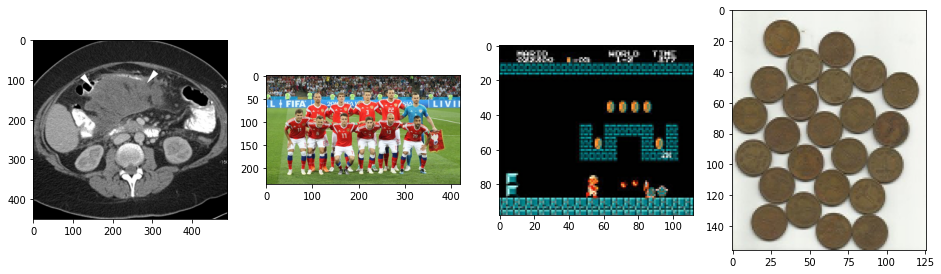

In [4]:
stomach, football = read_and_resize('stomach.jpg'), read_and_resize('football.jpg')
mario, coins = read_and_resize('mario.jpg'), read_and_resize('coins.jpg')
showInRow([stomach, football, mario, coins])

## Connected components

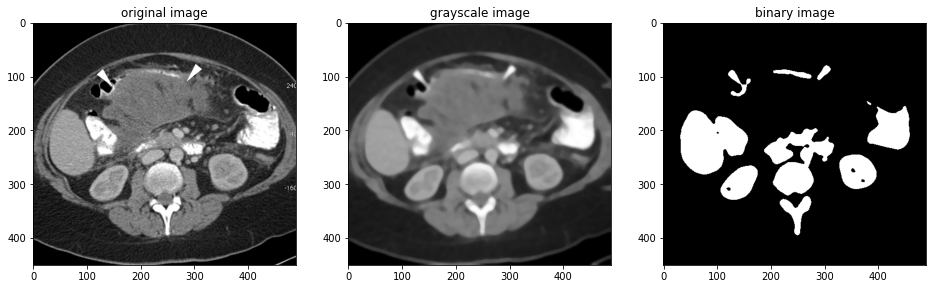

In [5]:
#@title Connected components { run: "auto" }
thresh_val = 137 #@param {type:"slider", min:0, max:255, step:1}

stomach_gray = cv2.cvtColor(stomach, cv2.COLOR_BGR2GRAY)
stomach_gray = cv2.GaussianBlur(stomach_gray,(11,11),0)
stomach_gray = cv2.medianBlur(stomach_gray,9)

# Thresholding
ret,stomach_bw = cv2.threshold(stomach_gray,thresh_val,255,cv2.THRESH_BINARY)

showInRow([stomach, stomach_gray, stomach_bw], ['original image', 'grayscale image', 'binary image'])

Input image shape is (451, 489)
Labels type is <class 'numpy.ndarray'>
Labels shape is (451, 489)
Number of labels is 11
Centroids coordinates 
 [[247.72143142 222.17925615]
 [298.95962733  92.83850932]
 [139.62558502 113.78783151]
 [242.32374101  95.13489209]
 [382.6        150.23333333]
 [423.72018758 199.15386333]
 [ 86.47787175 222.17309205]
 [248.36237152 257.6831286 ]
 [360.97538822 277.01904483]
 [142.35711859 298.45667686]
 [248.24084084 350.87207207]]
Statistics
 [[     0      0    489    451 188345]
 [   286     80     26     28    322]
 [   121     89     42     49    641]
 [   205     88     71     17    556]
 [   379    147      8      7     30]
 [   380    156     79     81   4478]
 [    32    164    126    119  10168]
 [   188    197    130    125   7978]
 [   328    246     69     64   3413]
 [   107    266     69     64   2943]
 [   217    323     59     73   1665]]
Connected components parameters:
labeled component 0
leftmost coordinate 286
top coordinate 80
cc width 

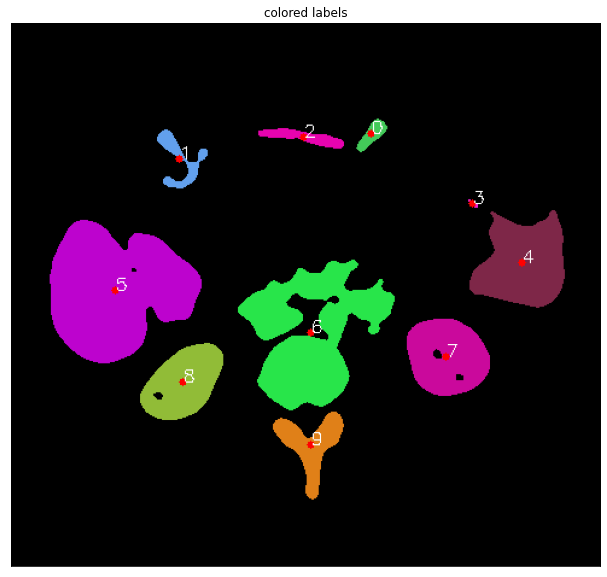

In [6]:
connectivity=4
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(stomach_bw, connectivity, cv2.CV_32S)

print('Input image shape is {}'.format(stomach_bw.shape))
print('Labels type is {}'.format(type(labels)))
print('Labels shape is {}'.format(labels.shape))
print('Number of labels is {}'.format(n_labels))
print('Centroids coordinates \n {}'.format(centroids))
print('Statistics\n {}'.format(stats))


colors = generate_colors(n_labels)

labeled_image = np.zeros((stomach_bw.shape[0],stomach_bw.shape[1],3), dtype=np.uint8)

print('Connected components parameters:')
print('================================================')

# loop over all components and determine if it is a number
for (i, label) in enumerate(range(1, n_labels)):
    labeled_image[labels == label,:]= colors[i]
    # centroid coordinates
    cent_x, cent_y = int(centroids[label,0]), int(centroids[label,1])
    cv2.circle(labeled_image,(cent_x, cent_y), 3, (255,0,0), -1)
    cv2.putText(labeled_image, str(i), (cent_x, cent_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(255,255,255),1)
    
    print('labeled component {}'.format(i))
    print('leftmost coordinate {}'.format(stats[label, cv2.CC_STAT_LEFT]))
    print('top coordinate {}'.format(stats[label, cv2.CC_STAT_TOP ]))
    print('cc width {}'.format(stats[label, cv2.CC_STAT_WIDTH]))
    print('cc height {}'.format(stats[label, cv2.CC_STAT_HEIGHT ]))
    print('cc area {}'.format(stats[label, cv2.CC_STAT_AREA]))
    print('================================================')
    

plt.title('colored labels')
plt.xticks([]),plt.yticks([])
plt.imshow(labeled_image)
plt.show()

### Highlight components in the source image

The number of organs found in the image is equal to: 10


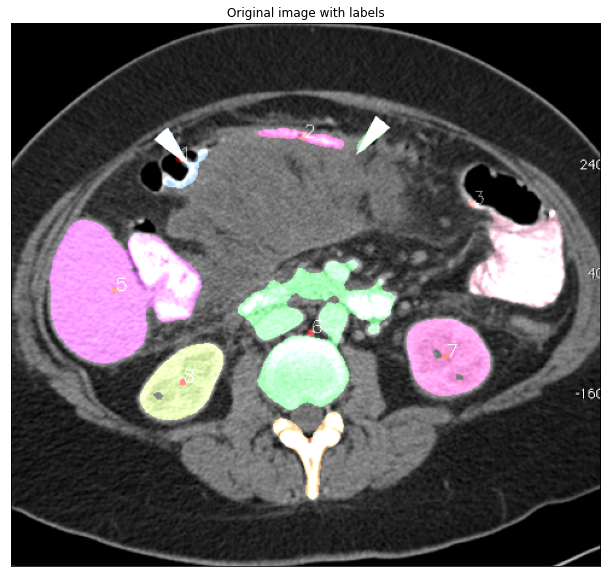

In [7]:
print('The number of organs found in the image is equal to: {}'.format(n_labels-1))
image_with_labels = cv2.addWeighted(stomach,1,labeled_image,0.5,0)
plt.title('Original image with labels')
plt.xticks([]),plt.yticks([])
plt.imshow(image_with_labels)
plt.show()

## Exercise: Calculate number of coins

Found 24 labels!


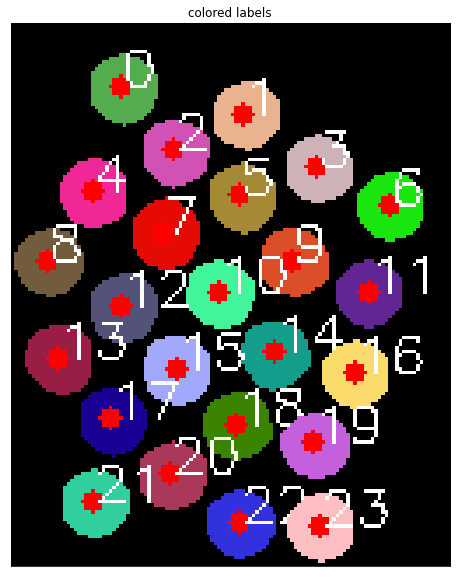

In [8]:
img_gray = read_and_resize('coins.jpg', grayscale = True)
# img_color = read_and_resize_image('keys.jpg')
fig = plt.figure(figsize=(10, 10))

# Create a binary image
ret, img_gray_bw = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY_INV)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))

# Apply morphological transformations (opening) to separate/segment coins
erosion = cv2.erode(img_gray_bw,kernel,iterations = 1)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
dilation =  cv2.dilate(erosion,kernel,iterations = 1)

# Find the connected components
connectivity=8
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(dilation, connectivity, cv2.CV_32S)

# Use the labels to color the coins you have found, draw a circle into their
# centroids and draw their ID/index next to the centroid!
colors = generate_colors(n_labels)

labeled_image = np.zeros((dilation.shape[0],dilation.shape[1],3), dtype=np.uint8)

for (i, label) in enumerate(range(1, n_labels)):
    labeled_image[labels == label,:]= colors[i]
    # centroid coordinates
    cent_x, cent_y = int(centroids[label,0]), int(centroids[label,1])
    cv2.circle(labeled_image,(cent_x, cent_y), 3, (255,0,0), -1)
    cv2.putText(labeled_image, str(i), (cent_x, cent_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(255,255,255),1)

    
print(f"Found {n_labels-1} labels!")
plt.title('colored labels')
plt.xticks([]),plt.yticks([])
plt.imshow(labeled_image)
plt.show()

## Template matching

**Available methods OpenCV:**  

***CV_TM_SQDIFF***

$$R(x,y)= \sum _{x',y'} (T(x',y')-I(x+x',y+y'))^2$$

***CV_TM_SQDIFF_NORMED***

$$R(x,y)= \frac{\sum_{x',y'} (T(x',y')-I(x+x',y+y'))^2}{\sqrt{\sum_{x',y'}T(x',y')^2 \cdot \sum_{x',y'} I(x+x',y+y')^2}}$$

***CV_TM_CCORR***

$$R(x,y)= \sum _{x',y'} (T(x',y')  \cdot I(x+x',y+y'))$$
  
***CV_TM_CCORR_NORMED***

$$R(x,y)= \frac{\sum_{x',y'} (T(x',y') \cdot I(x+x',y+y'))}{\sqrt{\sum_{x',y'}T(x',y')^2 \cdot \sum_{x',y'} I(x+x',y+y')^2}}$$

***CV_TM_CCOEFF***

$$R(x,y)= \sum _{x',y'} (T'(x',y')  \cdot I'(x+x',y+y'))$$

where

$$\begin{array}{l} T'(x',y')=T(x',y') - 1/(w  \cdot h)  \cdot \sum _{x'',y''} T(x'',y'') \\ I'(x+x',y+y')=I(x+x',y+y') - 1/(w  \cdot h)  \cdot \sum _{x'',y''} I(x+x'',y+y'') \end{array}$$

***CV_TM_CCOEFF_NORMED***

$$R(x,y)= \frac{ \sum_{x',y'} (T'(x',y') \cdot I'(x+x',y+y')) }{ \sqrt{\sum_{x',y'}T'(x',y')^2 \cdot \sum_{x',y'} I'(x+x',y+y')^2} }$$


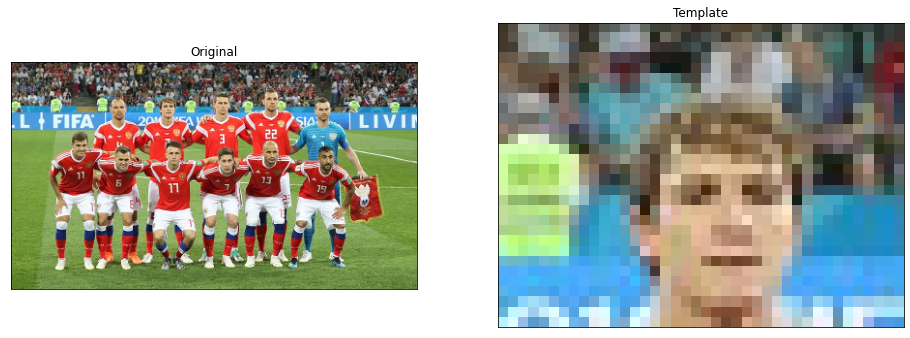

In [9]:
img_template = football[30:60,140:180]
plt.rcParams["figure.figsize"] = (16, 10)
showInRow([football, img_template], ["Original", "Template"], True)

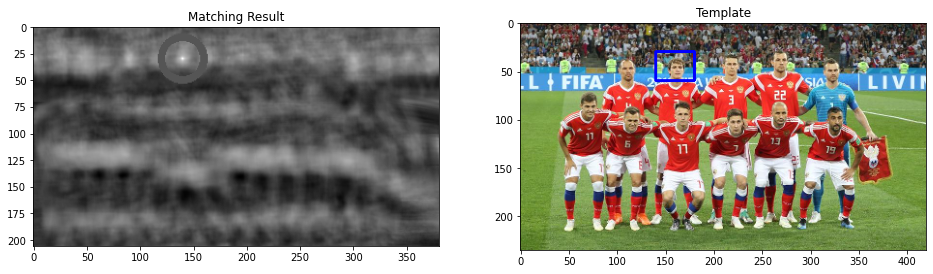

In [10]:
#@title Template matching { run: "auto" }

methods = {'TM_CCOEFF':cv2.TM_CCOEFF, 'TM_CCOEFF_NORMED':cv2.TM_CCOEFF_NORMED, 
           'TM_CCORR':cv2.TM_CCORR, 'TM_CCORR_NORMED':cv2.TM_CCORR_NORMED, 
           'TM_SQDIFF': cv2.TM_SQDIFF, 'TM_SQDIFF_NORMED':cv2.TM_SQDIFF_NORMED}


method = "TM_CCOEFF_NORMED" #@param ["TM_CCOEFF", "TM_CCOEFF_NORMED", "TM_CCORR", "TM_CCORR_NORMED", "TM_SQDIFF", "TM_SQDIFF_NORMED"]

img_detected = football.copy()
h, w, c = img_template.shape
res = cv2.matchTemplate(football,img_template,methods[method])
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
if method in ['TM_SQDIFF', 'TM_SQDIFF_NORMED']:
    top_left = min_loc
else:
    top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(img_detected,top_left, bottom_right, (0,0,255), 2)
cv2.circle(res,top_left, 20, (0,0,0), 5)    
    
showInRow([res, img_detected], ['Matching Result', 'Template'])    

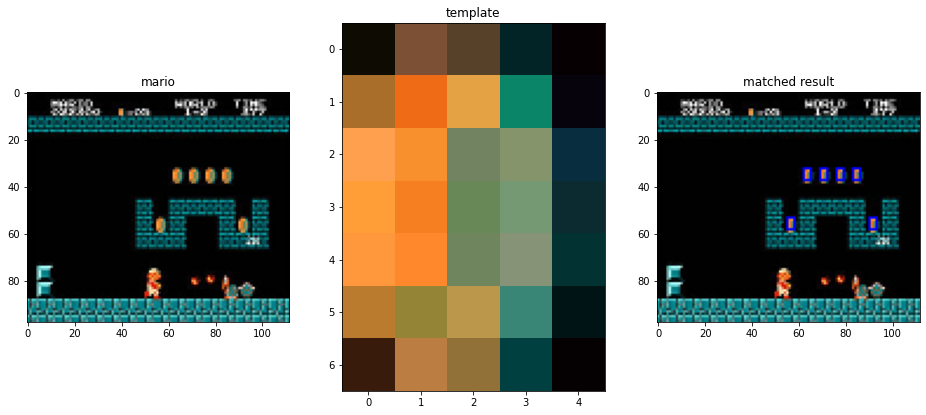

In [11]:
template = mario[32:39,62:67]
w, h, c = template.shape[::-1]
result = mario.copy()
res = cv2.matchTemplate(mario,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
  cv2.rectangle(result, pt, (pt[0] + w, pt[1] + h), (0,0,255), 1)

showInRow([mario, template, result], ['mario', 'template', 'matched result'])

### Usage of template matching:

1. Rotation invariant matching. We prepare 360 template images and run for each template matching<br>
2. Tracking of object without shape change<br>
![alt text](https://ars.els-cdn.com/content/image/1-s2.0-S111001681730203X-gr9.jpg)
3. Find the same objects of the scene

## Histogram of oriented gradients (HOG) and SVM

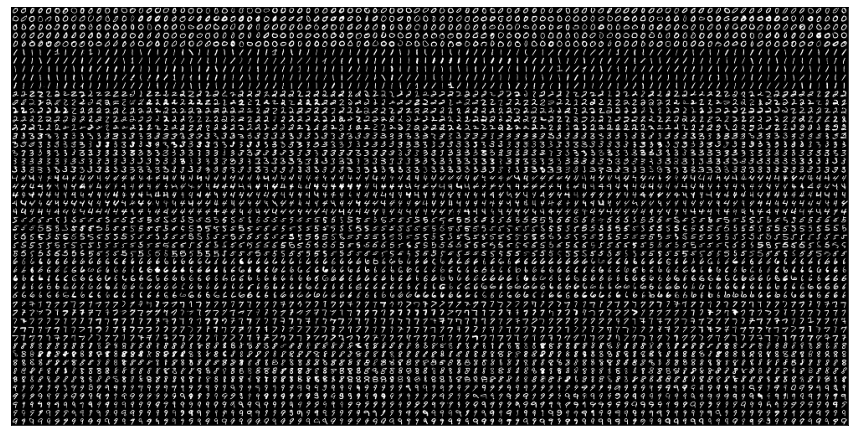

Shape of the image matrix: (500, 1000)


In [12]:
img_digits = read_and_resize('digits.png', grayscale = True)
fig = plt.figure(figsize=(15, 15))
plt.imshow(img_digits, 'gray')
plt.xticks([]),plt.yticks([])
plt.show()
print('Shape of the image matrix: {}'.format(img_digits.shape))

## Exercise: Train SVM classificator on handwritten digits and recognize number on key tag

Length: 50 Length of each element 100


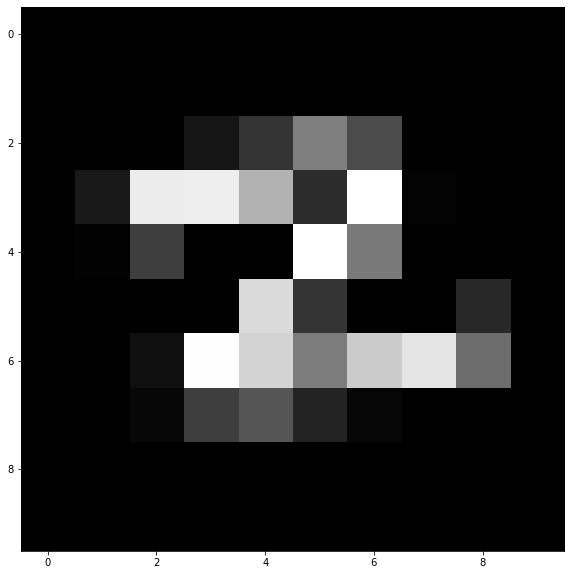

(10, 10)


In [13]:
# SPLIT DATA
cells = [np.hsplit(row,100) for row in np.vsplit(img_digits,50)]
print('Length:',len(cells),'Length of each element',len(cells[0]))
# First half is trainData, remaining is testData
train_cells = [ i[:50] for i in cells ]
test_cells = [ i[50:] for i in cells]

showInRow([train_cells[10][10]])
print(train_cells[0][0].shape)

In [89]:
def hog(img, group_size = 4, step = 1, bin_n = 16):
  # calculate gradient
  gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
  gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)

  # calculate magnitude and angle using cv2.cartToPolar
  mag, ang = cv2.cartToPolar(gx, gy)
  
  bins = np.int32(bin_n*ang/(2*np.pi))    # quantizing binvalues in (0...16)
  bin_cells = []
  mag_cells =[]
  if step is None: step = group_size
  # Divide the image (angle-bins and magnitudes) into cells
  # of size [group_size x group_size], with 'step' pixels step size using the
  # step parameter to reduce the number of cells
  for i in range(0,len(gx), step):
    if i-step < 10 - group_size:
      bin_cells.append(bins[i:i+group_size,i:i+group_size])
      mag_cells.append(mag[i:i+group_size,i:i+group_size])
  hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
  # Create histograms of the cells and stack them in vectors
  hist = np.hstack(hists)
  
  return hist

hist = hog(train_cells[10][10])
print(hist.shape)
print(hist.dtype)
print(hist)

(112,)
float64
[ 995.28302002   29.69848442  479.58332062 1669.27160645   54.
    0.            0.            0.          129.28263855    0.
    0.            0.            0.            0.            0.
    0.          995.28302002   29.69848442  753.50666046 2307.472229
    0.            0.            0.           28.07133675  129.28263855
    0.            0.            0.         1437.10107422    0.
  459.77819824  397.94723511  457.21984863  687.70227051 1474.42858887
 2842.33856201    0.            0.            0.          351.65748787
  129.28263855    0.            0.            0.         1437.10107422
  222.30158997    0.          397.94723511    0.          390.26657104
 1474.42858887    0.            0.          366.29223633  513.90466309
  351.65748787  129.28263855 1460.6625061     0.            0.
  672.96362305  222.30158997    0.         1206.10007477    0.
    0.          593.24530029    0.          661.7098999   366.29223633
    0.          323.58615112  156.9522247

In [90]:
######     Training      ########################
from sklearn import svm
from sklearn import metrics

hogdata = [list(map(hog,row)) for row in train_cells]
trainData = np.float32(hogdata)
trainData = trainData.reshape(-1, trainData.shape[2])
print(trainData.shape)
responses = np.int32(np.repeat(np.arange(10),250)[:,np.newaxis]) # These are the training labels

# Create a SVM, train it on the training data
#Create a svm Classifier
clf = svm.SVC(kernel='rbf', gamma='scale', C= 100) # Linear Kernel

#Train the model using the training sets
clf.fit(trainData, responses)


# svm.save('svm_data.dat')

######     Testing      ########################

hogdata = [list(map(hog,row)) for row in test_cells]
testData = np.float32(hogdata)
testData = testData.reshape(-1, testData.shape[2])
# result = svm.predict(testData)[1]
#Predict the response for test dataset
y_pred = clf.predict(testData)
# #######   Check Accuracy   ########################
# mask = result==responses
# correct = np.count_nonzero(mask)
# print (correct*100.0/result.size) 
print("Accuracy:",metrics.accuracy_score(responses, y_pred))

(2500, 112)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8972


## References

Connected Component: [link](https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f)

Template Matching: [link](https://docs.opencv.org/master/df/dfb/group__imgproc__object.html#ga3a7850640f1fe1f58fe91a2d7583695d)

HOG features explanation: [link](https://www.learnopencv.com/histogram-of-oriented-gradients/)  
HOG for car logo recognition: [link](https://gurus.pyimagesearch.com/lesson-sample-histogram-of-oriented-gradients-and-car-logo-recognition/)  
Handwritten digits classification using HOG: [link](https://www.learnopencv.com/handwritten-digits-classification-an-opencv-c-python-tutorial/)
OCR of Hand-written Data using SVM : [link](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_svm/py_svm_opencv/py_svm_opencv.html)

Handwritten Digits Classification : [link](https://github.com/spmallick/learnopencv/blob/master/digits-classification/common.py)